In [1]:
import torch
import torch.nn as nn
import math

In [2]:
class PositionalEncoding(nn.Module):
    """ Example adapted from:
    https :// pytorch .org/ tutorials / beginner / transformer_tutorial .html
    """
    def __init__(self , d_model , dropout =0.0, max_len =5000 ):
        super (PositionalEncoding , self).__init__()
        self.max_len = max_len
        pe = torch.zeros(max_len , d_model)
        position = torch.arange(0, max_len , dtype = torch.float ).unsqueeze (1)
        div_term = torch.exp( torch.arange(0, d_model , 2).float() * ( -math.log( 10000.0) / d_model ))
        pe[:, 0::2] = torch.sin( position * div_term )
        pe[:, 1::2] = torch.cos( position * div_term )
        # shape (max_len , 1, dim)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer ('pe', pe) # Will not be trained .

    def forward (self , x):
        # shape of x: (len , B, dim)
        assert x.size(0) < self.max_len , (
        f"Too long sequence : increase ‘max_len ‘")
        # shape of x (len , B, dim)
        x = x + self.pe[:x.size(0), :]
        return x

In [3]:
pos_enc = PositionalEncoding(128)

In [4]:
x = torch.zeros([40, 8, 128])

In [5]:
pe = pos_enc(x)

In [6]:
pe_example = pe[:, 0, :]

In [7]:
pe_example.size()

torch.Size([40, 128])

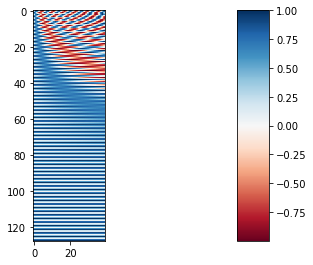

In [8]:
import matplotlib.pyplot as plt
plt.imshow(pe_example.transpose(0, 1), cmap='RdBu')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

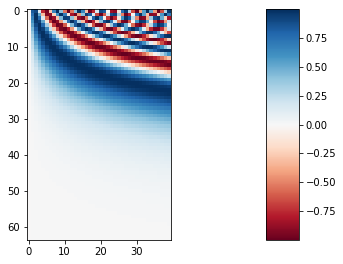

In [9]:
plt.imshow(pe_example[:, 0::2].transpose(0, 1), cmap='RdBu')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

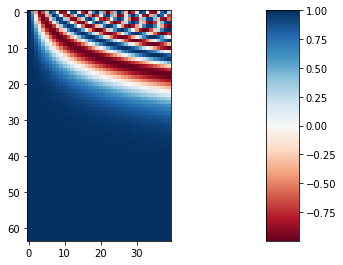

In [10]:
plt.imshow(pe_example[:, 1::2].transpose(0, 1), cmap='RdBu')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

In [11]:
pe = []
pe.append(pe_example[:, 0::2].transpose(0, 1))
pe.append(pe_example[:, 1::2].transpose(0, 1))

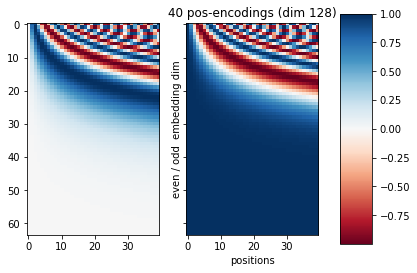

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharex=True, sharey=True)
plt.title('40 pos-encodings (dim 128)')

for i, ax in enumerate(axes.flat):
    im = ax.imshow(pe[i], cmap='RdBu')
    plt.xlabel('positions')
    plt.ylabel('even / odd  embedding dim')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(im, cax=cax)
plt.savefig('/home/kazuki/Downloads/pos_enc.eps', format='eps')

# axes.flat[0]
#for ax in axes.flat:
#    im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)